<a href="https://colab.research.google.com/github/RomaViraj/APT/blob/master/AT_Lesson_141_Reference_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 141: Satellite Imagery Analysis I - EDA Using EarthPy

---

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student. 

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Satellite Imagery Analysis I - EDA using EarthPy|
|||
|**Class Description**|In this class, a student will perform EDA on raster satellite data using EarthPy package|
|||
|**Class**|C141|
|||
|**Class Time**|50 minutes|
|||
|**Goal**|Installing EarthPy package|
||Plotting RGB composite image|
||Plotting Raster histograms|
||Plotting NDVI|
||Creating Hillshade Effects|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

#### Teacher-Student Activities

In the previous classes, we explored Choropleth maps using geospatial data acquired from a satellite. 

In today's class, we will learn different methods to explore and analyse the satellite data using Python. We will use **EarthPy** python package to handle the satellite imagery and to perform Exploratory Data Analysis (EDA) with the satellite data effectively.

Before that, let us understand some basic concepts concerning Satellite Data.

---

#### Understanding Satellite Imagery

**What is Satellite Data:**

- Satellite Data or satellite imagery implies information about Earth and other planets in the space, gathered by man-made satellites in their orbits. 
- Satellite Data is commonly used to deliver information about the surface and weather changes on the planet Earth.
- Satellite Data is generated via **Remote Sensing technologies**.

**What is Remote Sensing?**
- Remote Sensing means acquiring information from a distance.

- Remote Sensing is the process of detecting and monitoring the physical characteristics of an area by measuring its emitted radiation at a distance (typically from a satellite or an aircraft).

 <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/a586ee36-d312-4e3d-bfce-47553f712154.svg" height = 350/>

Image Credit: https://openclipart.org/detail/244734/satellite-imaging-remote-sensing

- Special cameras collect remotely sensed images, which helps the researchers "sense" things about the Earth. For example,  Cameras on satellites take images of temperature changes in the oceans. 


- Most of the satellite Data is available in the form of TIFFs files(`.tif` extension) which are raster image file.

Let us now understand what raster images are.

---

#### Understanding Raster Images and TIFF files

**What is a Raster?**

- A Raster consists of a matrix of cells (or pixels) organized into rows and columns (or a grid) where each cell contains a value representing information, such as temperature.

- Raster images are commonly .BMP, .GIF, .JPEG, .PNG, and .TIFF files. Today, almost all of the images you see on the Internet and images taken by a digital camera are raster images.

- Satellite imagery consists of raster images where each pixel value represents an area on the Earth's surface. 
  <center>
  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/a99d0d0e-7904-4dbd-82e4-3d2db4b025a0.png"/>

Image Source: https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm

  </center>

**TIFF and GeoTIFF images:**
- **TIFF** or **TIF** stands for **tagged image format**. It is an image file format for storing raster graphic images. 
- TIFFs are a handy way to store high-quality images before editing and is popular among graphic artists and photographers. 

- **GeoTIFFs** are raster image file types that are commonly used to store satellite imagery data, along with geographic metadata that describes the location in space of the image. 
- GeoTIFFs contains metadata or additional geographic information (latitude, longitude, map projection etc.) which are embedded as tags within the TIFF file. We will learn to explore these metadata information in this lesson.

Let us now start exploring raster images and perform EDA using EarthPy python package.

---

#### Activity 1: Installing EarthPy and Downloading Example Datasets

**EarthPy** is an open-source Python package that makes it easier to plot and work with  raster data.

EarthPy comes with the ability to download some example datasets. Let us first install Earthpy using the `! pip install` command.

In [ ]:
# S1.1: Install 'earthpy' package
! pip install earthpy

     |████████████████████████████████| 1.4 MB 8.8 MB/s 
     |████████████████████████████████| 19.3 MB 348 kB/s 
     |████████████████████████████████| 1.0 MB 39.9 MB/s 
     |████████████████████████████████| 16.7 MB 41.3 MB/s 
     |████████████████████████████████| 6.3 MB 45.1 MB/s 


There are 14 datasets available in the EarthPy package. To list the datasets that are available for download,
1. Import `earthpy` package.
2. Use `data` attribute of `earthpy` to list the example datasets.

In [ ]:
# S1.2: Print the list of sample datasets of 'earthpy' package.
import earthpy as ep
ep.data

Available Datasets: ['california-rim-fire', 'co-flood-extras', 'cold-springs-fire', 'cold-springs-landsat-scenes', 'cold-springs-modis-h4', 'colorado-flood', 'cs-test-landsat', 'cs-test-naip', 'naip-fire-crop', 'ndvi-automation', 'spatial-vector-lidar', 'twitter-flood', 'vignette-elevation', 'vignette-landsat']

Hence, following are the satellite datasets that are available to download:
1. california-rim-fire
2. co-flood-extras
3. cold-springs-fire
4. cold-springs-landsat-scenes
5. cold-springs-modis-h4
6. colorado-flood
7. cs-test-landsat
8. cs-test-naip
9. naip-fire-crop
10. ndvi-automation
11. spatial-vector-lidar
12. twitter-flood
13. vignette-elevation
14. vignette-landsat

To download these datasets, you can provide the appropriate data key to the `earthpy.data.get_data()` function for one of the datasets listed above.

You can see the downloaded files by opening the Files section on the left hand side of your colab file.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/3e0d6227-0267-474b-805b-c83e9ff58da9.PNG"/></center>


For example, let us download the "colorado-flood" dataset using `get_data()` function. Also use `earthpy.data.path = "."` to download the dataset in the current directory (i.e. `content` directory).

**Note:** If you do not specify the directory using `path` attribute, the dataset will be downloaded in the `root` folder. 

In [ ]:
# S1.3: Download 'colorado-flood' dataset.
# Specify a custom directory for data downloads using 'path' attribute.
ep.data.path = "."

# Specify the dataset name to download using 'data.get_data()' function.
ep.data.get_data('colorado-flood') 

Extracted output to ./colorado-flood/.


'./colorado-flood/.'

The output shows the url from where the dataset is downloaded and also the name of the directory where it is downloaded.

After running the above code cell, you can observe that the colorado-flood dataset files are downloaded in the current runtime.


<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/495966a0-9359-438c-9f0a-3adad3f20d1a.PNG"/></center>

In this lesson, we will use `'vignette-landsat'` dataset. 

**About `vignette-landsat` dataset:**

- This dataset contains **Landsat 8** data dated 2017 for an area surrounding the Cold Springs Fire boundary near Nederland, Colorado.
  
  **Note:** This data is used in code vignettes for the EarthPy package created and maintained by Earth Lab. For more information, see: https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html

Before exploring the dataset in more detail, let us first understand the Landsat Data.

**Landsat Data:**

- *Landsat* is an ongoing mission of Earth observation satellites developed under a joint program of the [USGS](https://www.usgs.gov/landsat-missions) (United States Geological Survey) and [NASA](https://landsat.gsfc.nasa.gov/) (National Aeronautics and Space Administration).
- The Landsat series of satellites provides the longest temporal record of moderate resolution multispectral data of the Earth's surface on a global basis for the last 40 years.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/74744ed8-b76f-4363-b35e-040f8d850852.png" height =300/>

`Landsat Missions since 1972. Image source:` [`USGS Landsat Timeline`](https://www.usgs.gov/landsat-missions/landsat-satellite-missions?qt-science_support_page_related_con=2#qt-science_support_page_related_con)

</center>

Let us first download the `'vignette-landsat'` dataset using `data.get_data()` function of `earthpy` package.

In [ ]:
# S1.4: Download 'vignette-landsat' dataset.
ep.data.get_data('vignette-landsat') 

Extracted output to ./vignette-landsat/.


You can use file explorer to explore the files inside `'vignette-landsat'` dataset.

<br/>

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ad873c9a-5820-4fa2-870c-5a62ff404bc6.PNG"/></center>

Many satellites like Landsat 8 collect infrared and ultraviolet light not visible to the human eye. This information is used to measure vegetation, biomass or to monitor forest fires. This information is collected using *sensors* mounted on the satellite in space that orbits the earth.

Each sensor has a specific set of spectral bands designed for the mission of the satellite. While some sensors may have only 3 or 4 bands, others may have dozens, or hundreds. These are called **hyperspectral sensors**. 

The Landsat 8 sensor has following 7 main spectral bands:

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/e89788f8-7a94-44dc-a902-948454d5a9cc.PNG"/>

`Table 1: Landsat 8 spectral bands`
</center>


Sometimes all the bands of the raster data are stored in a single `.tif` file. However, the 7 spectral bands of Landsat 8 data are downloaded as separate `.tif` files rather than a single `.tif` file as seen in the file explorer.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/07048c4a-d918-4ee4-8314-0d00468812f2.PNG"/></center>

Notice that there are some layers that have the word **band** in them. These are the 7 spectral bands that we need for our analysis.

Let us first generate a list of only those files in the directory that contain the word **band** in the name. For this, we will use the `glob()` function of Python's **Glob** module.

**The `glob()` function:**

- The `glob()` returns a list of files that match a specific pattern.
- We need to define that specific pattern within the `glob()` function. 
- For example, `glob("path/*.tif*")` will grab all files inside the specified path that end with the `.tif` extension.

Let us now generate a subset of files that includes the `.tif` files and contain the word "band" in them. For this, perform the following steps:
1. Import `glob` module as `gb`.
2. Use `glob()` function of `gb` and pass the pattern of the file name. 
  
  The pattern would be: `vignette-landsat/*band*.tif` 
  
  Here, 
  - `vignette-landsat` is the name of the directory where all `.tif` files are located.
  - `*band*.tif` is the pattern which indicates that the file name must contain the word "band" and end with ".tif".

3. Display the extracted paths.






In [ ]:
# S1.5: Grab files containing the word "band" and that end with .tif
import glob as gb
landsat_path = gb.glob("vignette-landsat/*band*.tif")
landsat_path

['vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band7_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1_crop.tif']

Thus, we stored all the 7 spectral bands data inside a single list.  Be sure that the bands are stored in numerical band order starting at 1 and ending at 7 inside the list. 

Since the data are not in order, let us apply the `sort()` function of list to sort the spectral band list alphabetically. 

In [ ]:
# S1.6: Sort the spectral bands (if not in sorted order).
landsat_path.sort()
landsat_path

['vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band7_crop.tif']

Now that we have obtained all the 7 spectral bands inside a list, let us plot different band combinations.

---

#### Activity 2: Plotting RGB Composite Image

A color image consists of three bands: <font color = red><b>red</font></b>, <font color = green><b>green</font></b>, and <font color = blue><b>blue</font></b>. However,  Landsat dataset has 7 spectral bands. These bands can be combined to create true RGB composite images as well as color infrared (CIR) images that are useful in highlighting vegetation in the image.

For creating a color RGB image, we need all of the bands together in the same file or "stack". To do so, EarthPy has a **`stack()`** function. 

**The `stack()` function:** 

- This function of `earthpy.spatial` module takes a set of `.tif` files and either export them as a single stacked `.tif` file or as a stacked NumPy array.
- The `stack()` function returns two objects, a stacked array and the `RasterIO` profile which is nothing but the metadata.

**Note:** You may use `help()` function to learn more about `stack()` function.

To create an image stack for Landsat data, perform the following steps:
1. Import `earthpy.spatial` as `es`.
2. Call `stack()` function and pass the list of 7 spectral bands as input to this function. Store the returned stacked array and metadata in two separate variables.
3. Print the metadata obtained after stacking all the 7 spectral bands.


In [ ]:
# S2.1: Create image stack for Landsat.
import earthpy.spatial as es
arr_st, meta = es.stack(landsat_path)
# Print metadata 
meta

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 2158, 'height': 1941, 'count': 7, 'crs': CRS.from_epsg(32613), 'transform': Affine(30.0, 0.0, 449085.0,
       0.0, -30.0, 4434855.0), 'tiled': False, 'interleave': 'band'}

From the above metadata, we can observe that the stacked dataset has following attributes:
1. Width (number of rows): 2158
2. Height (number of columns): 1941
3. Number of bands: 7

**Note:** Ignore the other attributes for now.

Let us now plot the stacked raster bands to visualise all 7 raster layers of Landsat 8 data. To do so, we use the EarthPy `plot_bands()` function.

**The `plot_bands()` function:**
- This function of `earthpy.plot` module can be used to plot a single raster band or multiple raster bands.
- This function takes the stack of the bands or a single band as input. 
- We can also give custom titles to each band by using the `title` parameter.

To plot the stacked composite image that contains all the 7 raster bands, follow the steps given below:
1. Import `earthpy.plot` as `epp`.
2. Import `matplotlib.pyplot` module.
3. Call the `plot_bands()` function of `epp` and pass the stacked array as input. 
4. Call the `show()` function of `matplotlib.pyplot` module to display the raster bands.



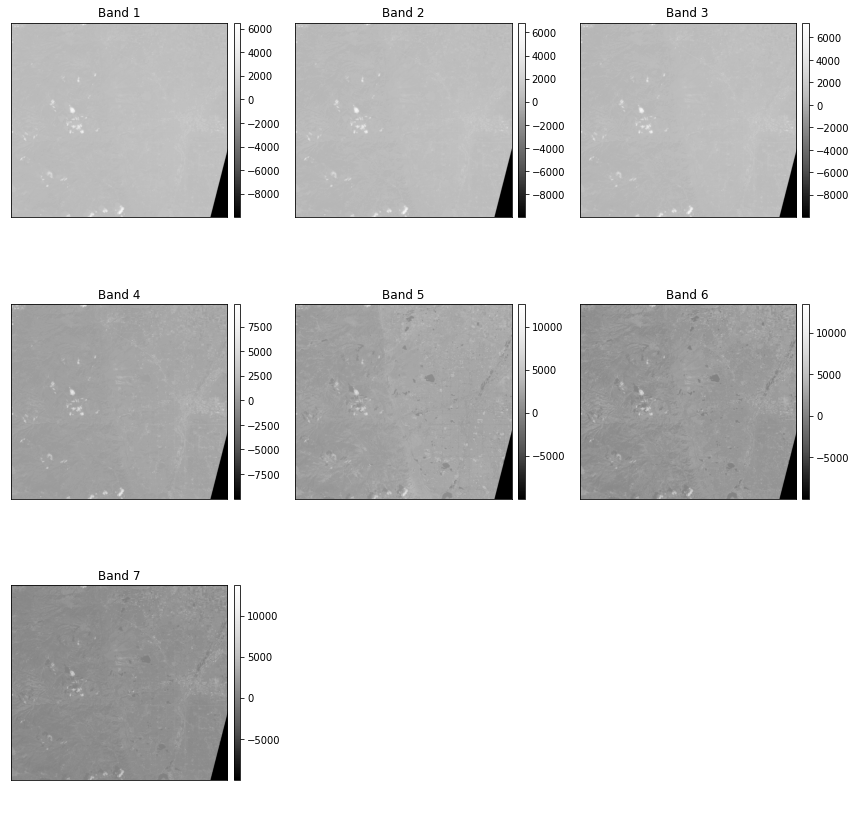

In [ ]:
# S2.2: Plot raster bands using 'plot_bands()' function.
import earthpy.plot as epp
import matplotlib.pyplot as plt

epp.plot_bands(arr_st)
plt.show()

You can also give unique titles for each raster image by providing a list of titles using the `title` parameter. 

We know that the Landsat 8 sensor have following 7 main spectral bands:

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/e89788f8-7a94-44dc-a902-948454d5a9cc.PNG"/>
</center>

Let us use the description column in the above table to give title to the respective bands. Perform the following steps to achieve this:

1. Create a list that contains the name of title to be given to each band like this:

  `band_titles = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]`

2. Call the `plot_bands()` function of `epp` and pass the stacked array and `title = band_titles` as input. 

3. Call the `show()` function of `matplotlib.pyplot` module to display the raster bands with custom titles.




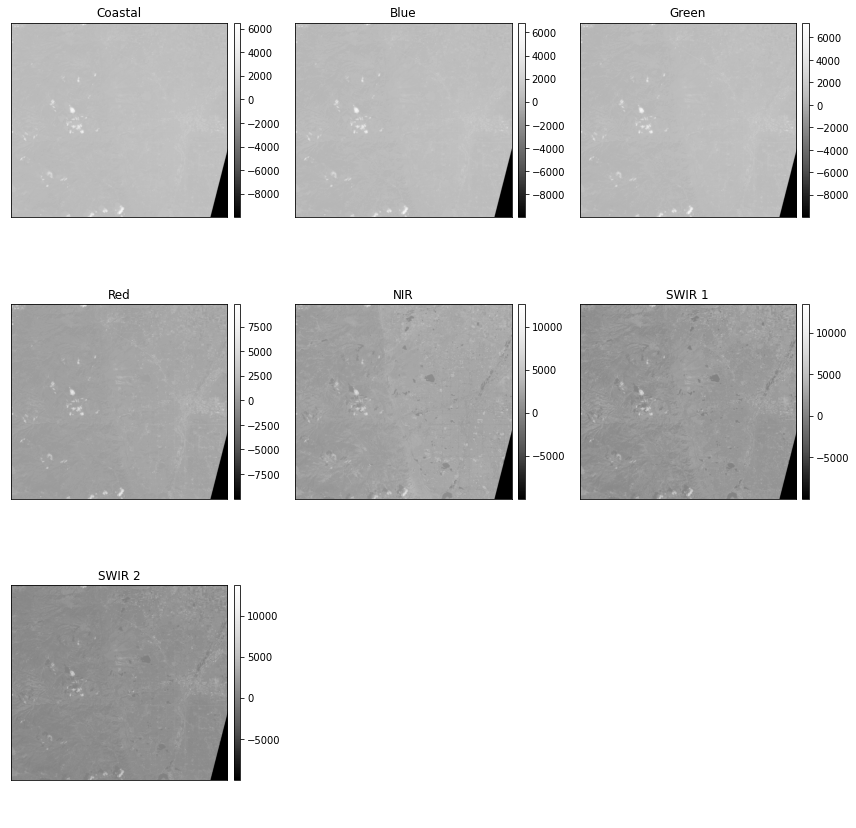

In [ ]:
# S2.3: Plot raster bands using 'plot_bands()' function and add custom titles.
band_titles = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]

epp.plot_bands(arr_st, title = band_titles)
plt.show()

You may observe that there are multiple bands that contain the data ranging from visible to infrared. Such data are hard to visualise for humans. 

In order to understand data more effectively, let us combine these bands to create a true color composite image or an RGB image. 

To plot 3 band color composite images, we can use `plot_rgb()` function of `earthpy.plot` module. Refer to the landsat bands given in the table below to recognise the red, green and blue bands.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/e89788f8-7a94-44dc-a902-948454d5a9cc.PNG"/>
</center>

For RGB images, we will plot the red, green, and blue bands, which are bands 4, 3, and 2, respectively, in the stacked array that we created. As Python uses a zero-based index system, the index for the red band is 3, green is 2, and blue is 1.
These index values are provided to the `rgb` argument to identify the bands for the composite image.

To create a RGB composite image, perform the following steps:
1. Call `plot_rgb()` function of `earthpy.plot` module and pass the following inputs:
 - Stacked image array.
 - `rgb = (3, 2, 1)`
 - `title = 'RGB Composite Image'`

2. Call the `show()` function of `matplotlib.pyplot` module to display the 3 bands image.





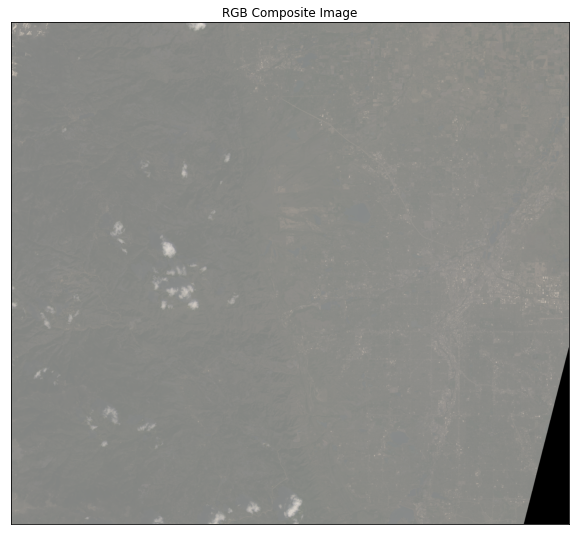

In [ ]:
# S2.4: Create a RGB composite image

epp.plot_rgb(arr_st, rgb = (3, 2, 1), title ='RGB Composite Image')
plt.show()

You can also provide the bands that you wish to plot by specifying the index number in `rgb` argument. For example, to create a composite image of near-infrared (NIR), red and green bands, we can specify `rgb = (4, 3, 2)` attribute within the `plot_rgb()` function. 

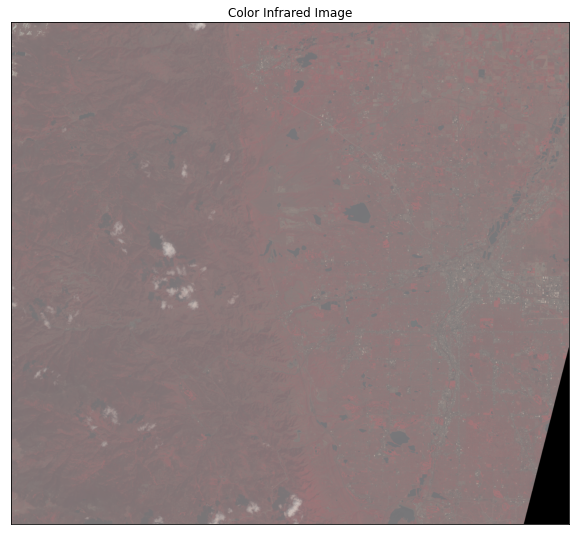

In [ ]:
# S2.5: Plot Color Infrared (CIR) composite image.
epp.plot_rgb(arr_st, rgb = (4, 3, 2), title ='Color Infrared Image')
plt.show()

However, you may notice that the RGB composite image looks dark. A composite image may appear dark if the range of  pixel brightness values  is closer to 0.

To increase the brightness of the image, we can **stretch** the pixel brightness values to extend to the full 0-255 range of values as shown in the image below:
<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/0aa42d40-23f7-410a-8bad-1be0aead85ca.png"/>

`Fig 2.1: Image stretching`</center>

Thus, to increase the visual contrast, we will use  `stretch = True` attribute inside the `plot_rgb()` function. Also, we can use `str_clip` attribute to specify how much of the tails of the data that we want to clip off. The larger the value of `str_clip` attribute, the more brightened the image would be.

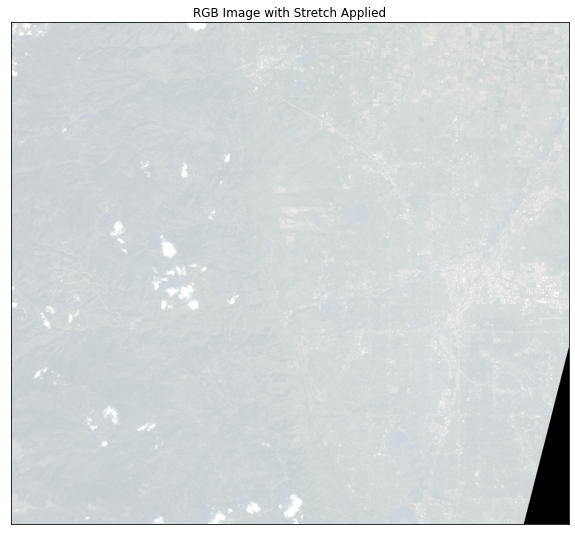

In [ ]:
# S2.6: Stretch the RGB composite image with str_clip = 0.5
epp.plot_rgb(arr_st, rgb = (3, 2, 1), stretch = True, str_clip = 0.5, 
             title = "RGB Image with Stretch Applied")

plt.show()

You can adjust the amount of linear stretch to further brighten the image by giving higher value of `str_clip` attribute. Let us make the RGB image more brighter this time by keeping `str_clip = 4`.

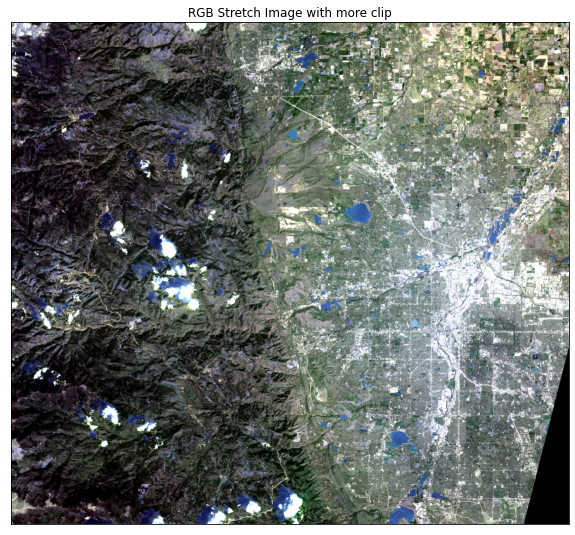

In [ ]:
# S2.7: Stretch the RGB composite image with str_clip = 4
epp.plot_rgb(arr_st, rgb = (3, 2, 1), stretch = True, str_clip = 4, 
             title = "RGB Stretch Image with more clip")

plt.show()

You may notice that stretching the RGB image did increase the contrast in our image. Let us now visualise each individual spectral bands to understand the distribution of values of the bands.

---

#### Activity 3: Multiband Raster Histograms

Just like we plotted each individual bands using `plot_bands()` function, we can also view a histogram of each spectral bands to visualise the values of these bands.

To do so, we can use the `hist()` function of `earthpy.plot` module to plot histograms for all bands in our raster.

Perform the following steps to achieve this:

1. Create a list that contains the name of title to be given to each band like this:

  `band_titles = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]`

2. Call the `hist()` function of `epp` and pass the stacked array and `title = band_titles` as input. 

3. Call the `show()` function of `matplotlib.pyplot` module to display the raster bands with custom titles.





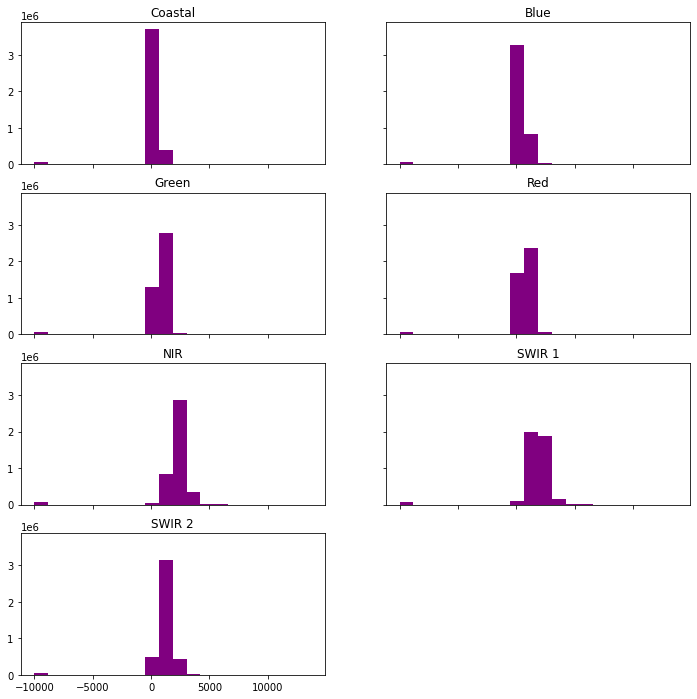

In [ ]:
# S3.1: Plot all band histograms using earthpy
band_titles = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]
epp.hist(arr_st, title = band_titles)
plt.show()


We can also modify the column size and colors of the individual histograms. To do, follow the steps given below:


1. Create a list that contains the colours to be given to each band like this:

  `colours_list = ['aqua', 'blue', 'green', 'red', 'orange', 'maroon', 'yellow']`

2. Call the `hist()` function of `epp` and pass the following inputs:
 - stacked image array.
 - `title = [f'Band {i}' for i in range(1, 8) ]` to give titles like Band 1, Band 2, Band 3 and so on.
 - `colors = colours_list` to display each histogram in a unique colour.
 - `cols = 3` to display maximum 3 histograms in each column of the plot grid.
 - `figsize = (12, 10)` to adjust the size of histograms.

3. Call the `show()` function of `matplotlib.pyplot` module to display the raster bands with custom titles.



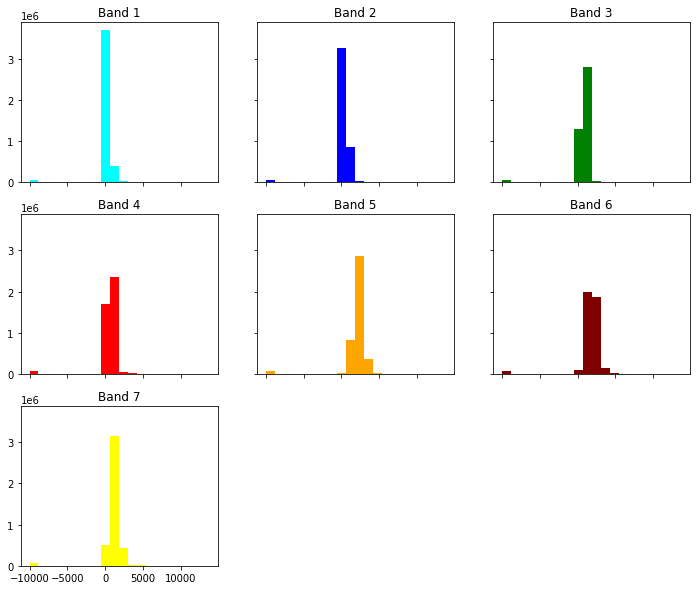

In [ ]:
# S3.2: Display histogram of each band with a different colour.
colours_list = ['aqua', 'blue', 'green', 'red', 'orange', 'maroon', 'yellow']

epp.hist(arr_st, colors = colours_list, title = [f'Band {i}' for i in range(1, 8) ], 
         cols = 3, figsize = (12, 10))

plt.show()

---

#### Activity 4: Plotting NDVI

Let us now determine the density of greenness on a patch of land by measuring a quantitative index value known as Normalized Difference Vegetation Index (NDVI). Let us understand this in more detail.

**Normalized Difference Vegetation Index (NDVI):**

- The NDVI is a simple graphical indicator that is used to assess whether or not the target area being observed contains live green vegetation.
- NDVI always ranges from -1 to 1, where -1 represents minimal or no greenness or presence of water and 1 represents maximum greenness.
- NDVI is calculated from the **visible light** and **near-infrared light** reflected by vegetation as observed in the image given below:

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/4cbf87ee-906f-471d-ac1d-137ce0ac5968.png"/>

 - **Healthy** vegetation (left) absorbs most of the visible light that hits it and reflects very less amount of it (e.g. 8% in the image). Also, it reflects a large portion of near-infrared light (e.g. 50% in the image). 
 - **Unhealthy** vegetation (right) reflects more visible light (e.g. 30% in the image) and less near-infrared light (e.g. 40% in the image) as compared to that of healthy vegetation. 

**How to calculate NDVI?**

- NDVI uses a ratio between near infrared and red light within the electromagnetic spectrum. 
- To calculate NDVI, we use the following formula:

  $$\text{NDVI} = \frac{\text{(NIR - Red)}}{\text{(NIR + Red)}}$$

- Here, 
  - $\text{NIR}$ is the reflection in the near-infrared spectrum.
  - $\text{Red}$ is the reflection in the red range of the spectrum. 

Let us now calculate NDVI for our stacked raster data. The most convenient way to calculate NDVI is to use `normalized_diff()` function of `earthpy.spatial` module. 

**Syntax of `normalized_diff()` function:** `normalized_diff(b1, b2)`

Where, 
  - $b1$ and $b2$ are the two numpy arrays used to calculate the normalized difference. 
  - It will be calculated as $\frac{(b1- b2)}{(b1+b2)}$.
  - This function returns a numpy array containing element-wise result of $\frac{(b1- b2)}{(b1+b2)}$.

For our Landsat 8 raster data, 
  - $b1$ is `arr_st[4]` as $\text{NIR}$ is at band 5 (index starts from 0).
  - $b2$ is `arr_st[3]` as $\text{Red}$ is at band 4.



In [ ]:
# S4.1: Calculate NDVI 
ndvi = es.normalized_diff(arr_st[4], arr_st[3])
ndvi

array([[ 0.51188032,  0.4375    ,  0.31081081, ...,  0.35361391,
         0.36243936,  0.37589306],
       [ 0.48864642,  0.43411295,  0.31301157, ...,  0.34814815,
         0.34425473,  0.35117674],
       [ 0.49777382,  0.46113074,  0.36025382, ...,  0.3271719 ,
         0.32386624,  0.33363992],
       ...,
       [ 0.50896159,  0.49396205,  0.46626866, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.47409689,  0.47032772,  0.44848859, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.4452757 ,  0.474413  ,  0.32042649, ..., -0.        ,
        -0.        , -0.        ]])

You may observe that a 2D numpy array is obtained in the output. Let us plot this 2D array using `plot_bands()` function. Also use the following attributes of `plot_bands()` function to customise the NDVI image:
- `cmap ="RdYlGn"`: To set colours for the colormap.
- `vmin = -1` and `vmax = 1`: To set the range of values to use for the colormap. 

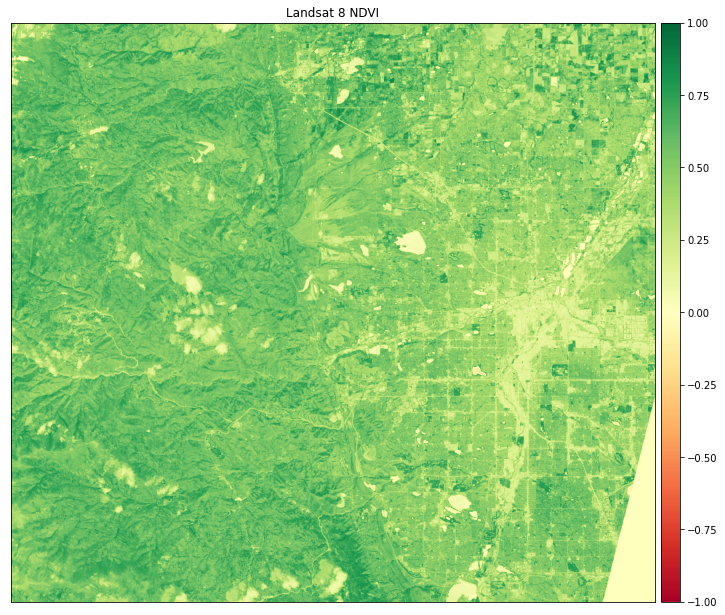

In [ ]:
# S4.2: Plot NDVI image.

epp.plot_bands(ndvi, title ='Landsat 8 NDVI', cmap = "RdYlGn", vmin = -1, vmax = 1)
plt.show()

From the above image, you may observe that the area possess moderate to dense vegetation. The yellow area having NDVI nearly equal to 0 are barren land area.

---

#### Activity 5: Creating Hillshade Effects

If we need to add depths and dimensions to our raster images, we can add **hillshade effect** in them. 

**What is a Hillshade?** 
- It is a 3D representation of a surface. 

<center>
   <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/72b6e066-b73a-4e60-a5db-8fbf8f6a04c8.png"/>

  `Fig 5.1: A sample Hillshade image`</center>

- Hillshades are generally displayed in greyscale. 
- The darker and lighter colors represent the shadows and highlights the sun's azimuth and altitude.

To create a hillshade effect, we can use digital elevation model (DEM) data. 

**What is Digital Elevation Model (DEM)?**
- DEM is a representation of the bare earth  topographic surface excluding trees, buildings and  other surface objects.  
- It is a type of raster data that contains an elevation value for each cell. 


We can obtain DEM data for our problem statement by downloading the `'vignette-elevation'` dataset from the `earthpy package`. 





In [ ]:
# S5.1: Download the elevation data 'vignette-elevation' and store it in current path (/content/ folder)
ep.data.get_data("vignette-elevation")

Extracted output to ./vignette-elevation/.


You can explore the `vignette-elevation` dataset by opening the Files section on the left hand side of your colab file. This folder contains a geotiff file named `pre_DTM.tif`. The path to this file would be `/content/vignette-elevation/pre_DTM.tif`. You can obtain the path to any file by using "Copy path" option obtained by right click.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/2433349c-9b75-4edb-92eb-d742191b3b3d.png"/>



Let us open this geotiff file using `rasterio` package and read the elevation data using the steps given below:

1. Import `rasterio` module as `rio`.
2. Import `numpy` module.
3. Store the path to `pre_DTM.tif` file in a variable.
4. Use `with rio.open()` statement to open the `.tif` file. Pass the path to the file as input to the `open()` function.
 - Inside `with` statement, use `read(1)` function to read 1 byte of elevation data at a time. Store this data in an array `elevation_arr`.
 - Replace the elevation values less than 0 with `nan` values.
5. Print the elevation array. 


In [ ]:
# T5.1: Open the DEM with  using rasterio
import rasterio as rio
import numpy as np
path = '/content/vignette-elevation/pre_DTM.tif'
with rio.open(path) as src:
    elevation_arr = src.read(1)
    # Set masked values to np.nan
    elevation_arr[elevation_arr < 0] = np.nan

elevation_arr

array([[      nan,       nan,       nan, ..., 1695.63  , 1695.4199,
        1695.4299],
       [      nan,       nan,       nan, ..., 1695.6   , 1695.5399,
        1695.36  ],
       [      nan,       nan,       nan, ..., 1695.38  , 1695.44  ,
        1695.37  ],
       ...,
       [      nan,       nan,       nan, ..., 1681.45  , 1681.39  ,
        1681.25  ],
       [      nan,       nan,       nan, ..., 1681.72  , 1681.57  ,
        1681.5599],
       [      nan,       nan,       nan, ..., 1681.89  , 1681.8099,
        1681.74  ]], dtype=float32)

Now that we have obtained a 2D numpy array containing the DEM data, let us plot this data using `plot_bands()` function.

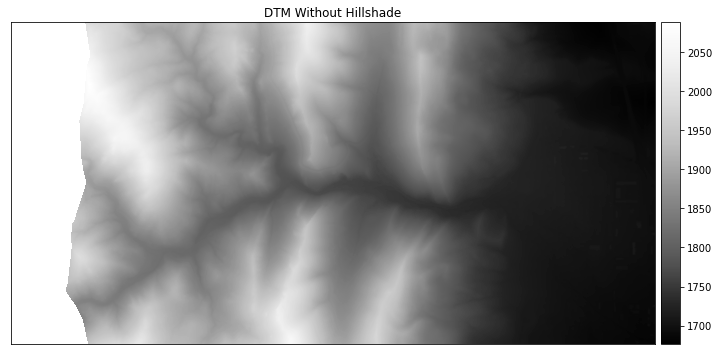

In [ ]:
# S5.2: Plot the data
epp.plot_bands(elevation_arr, title =" DEM Without Hillshade")
plt.show()

Once the DEM data is read and plotted, we can create hillshade of this elevation data using `hillshade()` function of `earthpy.spatial` module. This will return a numpy array containing the hillshade value of each pixel. 

Further plot this hillshade numpy array using `plot_bands()` function.





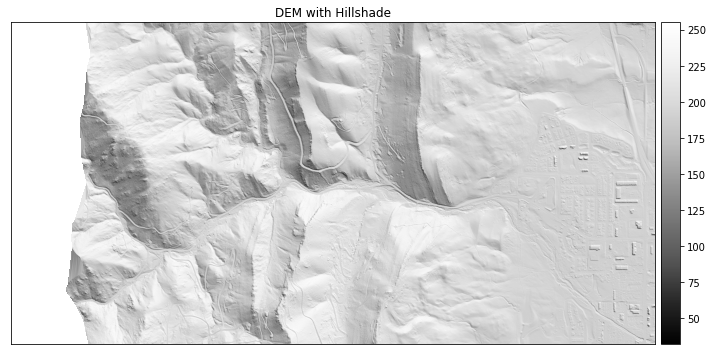

In [ ]:
# S5.3: Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation_arr)

epp.plot_bands(hillshade, title = "DEM with Hillshade")
plt.show()

You may observe the shades and shadows added to the DEM data. Thus, hillshades visually emphasise the topography of a land area  and adds depth to our map.



We will stop here. In the next class, we will  explore different types of vegetation indices and also calculate other indices to analyse satellite data for Sunderbans dataset. 

---

#### Activities


**Teacher Activities:**

1.   Satellite Imagery Analysis I - EDA using EarthPy (Class Copy)

    https://colab.research.google.com/drive/1iSEO8noHP5ziDvnI0LPG-_iSEAMxBupL


2.  Satellite Imagery Analysis I - EDA using EarthPy (Reference)

    https://colab.research.google.com/drive/1BjK5ICthEE3CWj0iU2J0K0ql3O2sw2xy

